# AIT Development notebook

## notebook of structure

| #  | Name                                               | cells | for_dev | edit               | description                                                                |
|----|----------------------------------------------------|-------|---------|--------------------|----------------------------------------------------------------------------|
| 1  | [Environment detection](##1-Environment-detection) | 1     | No      | uneditable         | detect whether the notebook are invoked for packaging or in production     |
| 2  | [Preparing AIT SDK](##2-Preparing-AIT-SDK)         | 1     | Yes     | uneditable         | download and install AIT SDK                                               |
| 3  | [Dependency Management](##3-Dependency-Management) | 3     | Yes     | required(cell #2)  | generate requirements.txt for Docker container                             |
| 4  | [Importing Libraries](##4-Importing-Libraries)     | 2     | Yes     | required(cell #1)  | import required libraries                                                  |
| 5  | [Manifest Generation](##5-Manifest-Generation)     | 1     | Yes     | required           | generate AIT Manifest                                                      |
| 6  | [Prepare for the Input](##6-Prepare-for-the-Input) | 1     | Yes     | required           | generate AIT Input JSON (inventory mapper)                                 |
| 7  | [Initialization](##7-Initialization)               | 1     | No      | uneditable         | initialization for AIT execution                                           |
| 8  | [Function definitions](##8-Function-definitions)   | N     | No      | required           | define functions invoked from Main area.<br> also define output functions. |
| 9  | [Main Algorithms](##9-Main-Algorithms)             | 1     | No      | required           | area for main algorithms of an AIT                                         |
| 10 | [Entry point](##10-Entry-point)                    | 1     | No      | uneditable         | an entry point where Qunomon invoke this AIT from here                     |
| 11 | [License](##11-License)                            | 1     | Yes     | required           | generate license information                                               |
| 12 | [Deployment](##12-Deployment)                      | 1     | Yes     | uneditable         | convert this notebook to the python file for packaging purpose             |

## notebook template revision history

1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

1.0.0 2020/10/12

* new cerarion

## body

### #1 Environment detection

[uneditable]

In [1]:
# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

### #2 Preparing AIT SDK

[uneditable]

In [2]:
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

### #3 Dependency Management

#### #3-1 [uneditable]

In [3]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

#### #3-2 [required]

In [4]:
if not is_ait_launch:
    requirements_generator.add_package('adversarial-robustness-toolbox', '1.19.0')
    requirements_generator.add_package('numpy','1.26.4')
    requirements_generator.add_package('h5py','3.12.1')
    requirements_generator.add_package('torch','2.5.1')
    requirements_generator.add_package('matplotlib','3.9.4')
    requirements_generator.add_package('pandas','2.2.3')

#### #3-3 [uneditable]

In [5]:
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -q -r $requirements_path 

### #4 Importing Libraries

#### #4-1 [required]

In [6]:
# import if you need modules cell

from art.attacks.evasion import SquareAttack
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import PyTorchClassifier
from art.estimators.regression import PyTorchRegressor
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import h5py
import math

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### #4-2 [uneditable]

In [7]:
# must use modules
from os import path
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

### #5 Manifest Generation

[required]

In [8]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_model_adversarial_robustness')
    manifest_genenerator.set_ait_description('深層学習モデルに対して、入力データに摂動を加え敵対的データを距離尺度の制約下で生成し、摂動に対する強度と予測性能の変化を評価して頑強性を測定する。分類モデルの場合、各クラスごとの入力画像データに摂動を加え敵対的データを生成する。攻撃手法はSquare Attackを使用する。また、回帰モデルの場合、入力テーブルデータに摂動を加え敵対的データを生成する。攻撃手法はFastGradientMethodを使用する。')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_eval_model_adversarial_robustness')
    manifest_genenerator.set_ait_version('1.2')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.add_ait_keywords('Robustness')
    manifest_genenerator.add_ait_keywords('Adversarial')
    manifest_genenerator.add_ait_keywords('Empirical')
    manifest_genenerator.add_ait_keywords('image')
    manifest_genenerator.add_ait_keywords('table')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/C-2機械学習モデルの安定性')
    #### Inventories
    inventory_requirement_dataset = manifest_genenerator.format_ait_inventory_requirement(format_=['*'])
    manifest_genenerator.add_ait_inventories(name='input_dataset',  
                                             type_='dataset', 
                                             description='分類モデルの場合、HDF5形式のデータセット。内部は2つのHDF5ファイルを用意する(ファイル名は任意)\n(1)モデルに入力される、[-1,1]に正規化されている多次元配列を含むデータセット\n(2)データの各サンプルの正解ラベル（クラスのインデックス値）を含むデータセット\n\nファイル構造:\n sample.h5\n ├(1)入力データセット\n └(2)ラベルデータセット\n 回帰モデルの場合、CSV形式のデータセット。データセットの最後の列を正解ラベルとし、それ以外を特徴量とする。\n',  
                                             requirement= inventory_requirement_dataset)
    inventory_requirement_trained_model = manifest_genenerator.format_ait_inventory_requirement(format_=['pth'])
    manifest_genenerator.add_ait_inventories(name='trained_model',
                                             type_='model',
                                             description='torch.jit.save関数を使用しTorchScript形式で保存されたモデルデータ。入力と出力の要素数はinput_dataset inventoryと一致させる',
                                             requirement=inventory_requirement_trained_model)
    #### Parameters
    manifest_genenerator.add_ait_parameters(name='data_type',
                                            type_='str',
                                            description='使用するデータセットの種類.[image]または[table]',
                                            default_val='image')
    manifest_genenerator.add_ait_parameters(name='image_dataset_name', 
                                            type_='str', 
                                            description='画像データを用いる場合の、input_dataset inventoryで説明されているデータセット(1)の名前', 
                                            default_val='image_name')
    manifest_genenerator.add_ait_parameters(name='label_dataset_name', 
                                            type_='str', 
                                            description='画像データを用いる場合の、input_dataset inventoryで説明されているデータセット(2)の名前', 
                                            default_val='label_name')
    manifest_genenerator.add_ait_parameters(name='dataset_channel',
                                          type_='int',
                                          default_val='1',
                                          description='画像データを用いる場合の、input_dataset inventoryで説明されているデータセット(1)入力データセットのチャネル数(グレースケール画像の場合1、RGB画像の場合3)')
    manifest_genenerator.add_ait_parameters(name='delta_lower',
                                            type_='float',
                                            description='敵対的摂動δの範囲の下限.敵対的摂動δの範囲の上限よりも小さくする.',
                                            default_val='0',
                                            min_value='0')
    manifest_genenerator.add_ait_parameters(name='delta_upper',
                                            type_='float',
                                            description='敵対的摂動δの範囲の上限.敵対的摂動δの範囲の下限よりも大きくする.',
                                            default_val='3',
                                            max_value='10')
    manifest_genenerator.add_ait_parameters(name='delta_increment',
                                            type_='float',
                                            description='敵対的摂動δの増加量',
                                            default_val='0.1',                                            
                                            min_value='0.01',
                                            max_value='1')
    manifest_genenerator.add_ait_parameters(name='norm',
                                            type_='str',
                                            description='制約に使用するノルムは次の３パターン.1の場合L1ノルム、2の場合L2ノルム、infの場合L∞ノルムを使用する',
                                            default_val='2')                                         
    manifest_genenerator.add_ait_parameters(name='epsilon',
                                            type_='float',
                                            description='各クラスのモデルの元のデータに対する予測確率と敵対的データに対する予測確率の差の許容範囲（0の場合、モデルの元のデータに対する予測と敵対的データに対する予測が一致しているかを判断する）',
                                            default_val='0.2',
                                            min_value='0',
                                            max_value='1')
    #### Measures
    manifest_genenerator.add_ait_measures(name='Adversarial_Robustness',
                                          type_='float',
                                          structure='sequence',
                                          description='敵対的摂動δの値を増加させたとき、（各クラスごとの）予測確率の差が許容範囲内もしくは予測が一致する最大のδの値を相対化した値.値が大きいほど頑強である.')
    #### Resources
    manifest_genenerator.add_ait_resources(name='Violation_Rate_Transition_Plot',
                                         type_='picture', 
                                         description='敵対的摂動δの値を増加させたとき、各クラスごとのモデルの違反率（予測確率の差が許容範囲外もしくは予測が一致していない割合）の推移のプロット')
    manifest_genenerator.add_ait_resources(name='Robustness_Variation_Plot',
                                         type_='picture', 
                                         description='敵対的摂動δの値を増加させたとき、モデルの頑強性の推移のプロット')
    #### Downloads
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

### #6 Prepare for the Input

[required]

In [9]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    """
    # imageデータを使用する場合
    input_generator.add_ait_inventories(name='input_dataset',
                                        value='mnist_data/aug_test.h5')
    input_generator.add_ait_inventories(name='trained_model',
                                        value='models/LeNet5_model.pth')
    input_generator.set_ait_params("data_type", "image")
    input_generator.set_ait_params("image_dataset_name", "test_image")
    input_generator.set_ait_params("label_dataset_name", "test_label")
    input_generator.set_ait_params("delta_upper", "2")
    """
    # tableデータを使用する場合
    input_generator.add_ait_inventories(name='input_dataset',
                                        value='california_housing_prices/test_housing.csv')
    input_generator.add_ait_inventories(name='trained_model',
                                        value='models/best_model.pth')
    input_generator.set_ait_params("data_type", "table")
    input_generator.set_ait_params("delta_upper", "1")
    input_generator.set_ait_params("delta_increment", "0.05")
    input_generator.set_ait_params("epsilon", "1")
    
    input_generator.write()

### #7 Initialization

[uneditable]

In [10]:
logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

### #8 Function definitions

[required]

In [11]:
@log(logger)
def load_h5_data(h5_filepath,image_dataset_name,label_dataset_name, batch_size=64):
    """
    h5形式のデータセットから入力画像とラベルを取得する
    parameter:
        h5_filename:ファイルのパス
        batch_size:バッチサイズ
    return:
        images:入力画像データ
        labels:ラベルデータ
    
    """
    with h5py.File(h5_filepath,'r') as h5_file:
        images = h5_file[image_dataset_name][:]
        labels = h5_file[label_dataset_name][:]
        images = np.array(images)
        labels = np.array(labels)

    return images ,labels

In [12]:
@log(logger)
def images_shape(images,channels):
    """
    入力画像の形状が(N,H,W)の場合、(N,Channel,H,W)に変換
    parameter:
        images:入力画像
        channels:チャネル数
    return:
        images:調整した入力画像
    """
    if len(images.shape) == 3:
        images = np.repert(images[:,np.newaxis,:,:],channels,axis=1)
    return images

In [13]:
@log(logger)
def calcurate_robustness(classifier,images,labels,channels,epsilon,delta_lower,delta_upper,delta_increment,norm):
    """
    各クラスごとの違反率が０の最大のδの値を計算
    parameter:
        classifier:ARTのPyTorchClassifier
        images:入力画像データ
        labels:ラベルデータ
        channels:入力画像のチャネル数
        epsilon:許容範囲(ε)
        delta_lower:敵対的摂動δの範囲の上限
        delta_upper:敵対的摂動δの範囲の下限
        delta_increment:敵対的摂動δの増加量
        norm:使用する距離尺度
    return:
        class_robustness:各クラスごとの評価値の辞書
        violation_rate_list:違反率のリスト
    """

    violation_rate_list =[]

    #δの範囲の設定
    deltas = np.arange(delta_lower,delta_upper+delta_increment,delta_increment)
    class_robustness = {cls:0 for cls in range(classifier.nb_classes)}

    for delta in deltas:
        
        if delta ==0:
            #元のデータに対する予測確率
            pred_original = classifier.predict(images)
            pred_adversarial = pred_original
            prob_diff = np.abs(pred_original - pred_adversarial)
        else:       
            #Square Attackの初期化
            square_attack = SquareAttack(estimator = classifier, norm = norm,eps=delta,verbose=False,max_iter=50)
            #敵対的データの生成
            adv_images= square_attack.generate(x=images)
            
            #元のデータに対する予測確率
            pred_original = classifier.predict(images)
            if classifier.nb_classes==2:
                pred_original = torch.sigmoid(torch.tensor(pred_original)).numpy()
            else:
                pred_original = F.softmax(torch.tensor(pred_original),dim=1).numpy()
            #敵対的データに対する予測確率
            pred_adversarial = classifier.predict(adv_images)
            if classifier.nb_classes==2:
                pred_adversarial = torch.sigmoid(torch.tensor(pred_adversarial)).numpy()
            else:
                pred_adversarial = F.softmax(torch.tensor(pred_adversarial),dim=1).numpy()
            #元のデータに対する予測確率と敵対的データに対する予測確率の差を計算
            prob_diff = np.abs(pred_original - pred_adversarial)
            
        for cls in range(classifier.nb_classes):
            #現在のクラスに対応するデータインデックスの取得
            class_idx = np.where(labels == cls)[0]
            class_prob_diff = prob_diff[class_idx]
            #epsilon=0の時、予測が一致しているかを判断
            if epsilon == 0:
                if classifier.nb_classes==2:
                    pred_original_class = (pred_original[class_idx]>0.5).astype(int)
                    pred_adversarial_class = (pred_adversarial[class_idx]>0.5).astype(int)
                else:
                    pred_original_class = np.argmax(pred_original[class_idx],axis=1)
                    pred_adversarial_class = np.argmax(pred_adversarial[class_idx],axis=1)
                violations = pred_original_class != pred_adversarial_class
            #epsilon!=0のとき、予測確率が許容範囲内かを判断
            else:
                violations = np.any(class_prob_diff > epsilon,axis=1)
            #違反率の保存
            violation_rate = np.mean(violations)
            violation_rate_list.append(violation_rate)
            #違反率が0かつ、一回前のδで更新しているもしくはδの値が下限のとき、δを更新
            if violation_rate == 0 and (math.isclose(class_robustness[cls],delta-delta_increment) or delta == delta_lower):
                class_robustness[cls] = delta
            
    #δの相対化
    for cls in range(classifier.nb_classes):
        if norm == 1:
            class_robustness[cls] = class_robustness[cls] /(0.5*channels)
        elif norm == 2:
            class_robustness[cls] = class_robustness[cls] /np.sqrt(0.5*channels)
        else:
            class_robustness[cls] = class_robustness[cls] /0.5
    return class_robustness,violation_rate_list

In [14]:
@log(logger)
@resources(ait_output, path_helper, 'Violation_Rate_Transition_Plot')
def print_plot(deltas,class_violation_rate_list,cls, file_path: str=None):
    """
    プロットを表示する関数
    parameter:
        deltas:敵対的摂動δのリスト
        class_violation_rate_list:クラスごとの違反率のリスト
        cls:クラスラベル（クラスのインデックス値）
    """
    file_name = "class"+str(cls)+"_Violation_Rate_Transition_Plot.png"
    file_path = file_path+file_name
    plt.figure(figsize=(8,6))
    plt.plot(deltas,class_violation_rate_list,marker='o',linestyle='-',color='b')
    plt.title(f"class{cls} :Violation Rate Transition")
    plt.xlabel("delta")
    plt.ylabel("Violation Rate")
    plt.grid(True)
    plt.savefig(file_path)
    plt.show()
    
    return file_path

In [15]:
@log(logger)
@measures(ait_output, 'Adversarial_Robustness', is_many=True)
def Robustness_list(class_robustness,classifier):
    """
    各クラスごとの評価値の辞書から評価値の配列を生成
    parameter:
        class_robustness:各クラスごとの評価値の辞書
        num_class:クラスラベルの数
    """
    Adversarial_Robsutness_list = []
    for cls in range(classifier.nb_classes):
        Adversarial_Robsutness_list.append(class_robustness[cls])
    return np.array(Adversarial_Robsutness_list)

In [16]:
@log(logger)
def calculate_empirical_robustness(features_tensor, labels_tensor, deltas, model, regressor, norm):
    """
    Empirical Robustnessを計算する関数。

    Parameters:
    features_tensor (torch.Tensor): 特徴量
    labels_tensor (torch.Tensor): ラベル（正解値）
    deltas (array-like): 摂動の範囲（delta）
    model (torch.nn.Module): 訓練済みモデル
    regressor (object): 回帰モデル（ARTなどで使用）
    norm (int): 使用するノルム（例えば2ノルム）

    Returns:
    tuple: それぞれのdeltaに対応するrobustnessとepsの値
    """
    robustness_values = []
    eps_values = []

    # 攻撃前の予測値を最初に計算しておく
    adv_x_no_attack = features_tensor.numpy()  # 攻撃なしの特徴量
    adv_labels_no_attack = model(torch.tensor(adv_x_no_attack, dtype=torch.float32))  # 攻撃なしでの予測値

    # それぞれのdeltaに対するEmpirical Robustnessを計算
    for delta in deltas:
        # FastGradientMethodの設定
        attack = FastGradientMethod(
            estimator=regressor,  # 回帰モデル
            eps=delta,  # 現在の摂動の大きさ
            norm=norm,  # 指定されたノルム
        )
        # 攻撃を加える
        adv_x = attack.generate(x=features_tensor.numpy())  # features_tensor を numpy 配列に変換

        # 攻撃後の予測値を計算
        adv_labels = model(torch.tensor(adv_x, dtype=torch.float32))

        # 攻撃なしの予測値と攻撃後の予測値の差異を計算（Empirical Robustness）
        robustness = np.mean(np.abs(adv_labels.detach().numpy() - adv_labels_no_attack.detach().numpy()))
        
        # 結果をリストに追加
        robustness_values.append(robustness)
        eps_values.append(delta)

        print(f"Empirical Robustness for eps={delta:.2f}: {robustness_values[-1]:.2f}")

    return robustness_values, eps_values


In [17]:
@log(logger)
@resources(ait_output, path_helper, 'Robustness_Variation_Plot')
def plot_robustness(eps_values, robustness_values, file_path: str=None):
    """
    Empirical Robustnessをプロットする関数。

    Parameters:
    eps_values (list): 各摂動（delta）の値
    robustness_values (list): 各摂動に対するEmpirical Robustnessの値
    """
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(8, 6))
    plt.plot(eps_values, robustness_values, marker='o', linestyle='-', color='b')
    file_name = "Empirical_Robustness_Plot.png"
    file_path = file_path+file_name
    plt.xlabel('Eps', fontsize=12)
    plt.ylabel('Empirical Robustness', fontsize=12)
    plt.title('Empirical Robustness vs. Eps', fontsize=14)
    plt.grid(True)
    plt.savefig(file_path)
    plt.show()

In [18]:
@log(logger)
@measures(ait_output, 'Adversarial_Robustness', is_many=True)
def find_max_eps_within_robustness(eps_values, robustness_values, epsilon):
    """
    Empirical Robustnessがepsilonを超えない最大のepsを探す関数。
    
    Parameters:
    eps_values (list): 各摂動（delta）の値
    robustness_values (list): 各摂動に対するEmpirical Robustnessの値
    epsilon (float): 許容される最大のEmpirical Robustness
    
    Returns:
    list: robustなeps（許容範囲内最大eps）を格納したリスト
    """
    max_eps = None
    max_eps_list = []
    for eps, robustness in zip(eps_values, robustness_values):
        if robustness <= epsilon:
            max_eps = eps
    
    # 結果を表示
    print(f"許容範囲内最大（Empirical Robustness:{epsilon}）のepsは {max_eps:.2f} です")
    max_eps_list.append(max_eps)
        
    return np.array(max_eps_list)

In [19]:
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

### #9 Main Algorithms

[required]

In [20]:
@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)

def main() -> None:
    
    #モデルの読み込み
    trained_model = ait_input.get_inventory_path('trained_model')
    try:
        model = torch.jit.load(trained_model)
    except Exception as e:
        print(e)
    model.eval()
    
    #許容範囲の設定
    epsilon=ait_input.get_method_param_value('epsilon')
    #敵対的摂動δの範囲の設定
    delta_lower=ait_input.get_method_param_value('delta_lower')
    delta_upper=ait_input.get_method_param_value('delta_upper')
    delta_increment=ait_input.get_method_param_value('delta_increment')
    if delta_upper < delta_lower:
        raise ValueError("delta_upper is smaller than delta_lower")
    else:
        deltas = np.arange(delta_lower,delta_upper+delta_increment,delta_increment)
    
    #normの設定
    norm =ait_input.get_method_param_value('norm')
    if norm == "1":
        norm =1
    elif norm == "2":
        norm = 2
    elif norm =="inf":
        norm = np.inf
    else:
        raise ValueError("norm not found")
            
    data_type = ait_input.get_method_param_value('data_type')    
    if data_type == 'image':

        #データセットの読み込み
        h5_filepath = ait_input.get_inventory_path('input_dataset')
        image_dataset_name = ait_input.get_method_param_value('image_dataset_name')
        label_dataset_name = ait_input.get_method_param_value('label_dataset_name')
        images ,labels =load_h5_data(h5_filepath,image_dataset_name,label_dataset_name)
        max_value = np.max(images)
        min_value = np.min(images)
        #チャネル数の読み込み
        channels = ait_input.get_method_param_value('dataset_channel')
    
        #データセットの調整
        images = images_shape(images,channels)
    
        #画像データの形状とラベル数の読み込み
        input_shape = images.shape[1:]
        num_class = len(np.unique(labels))
    
        #損失関数の設定
        if num_class > 2:
            loss_fn = torch.nn.CrossEntropyLoss()
        elif num_class == 2:
            loss_fn = torch.nn.BCEWithLogitsLoss()
        else:
            raise ValueError("The number of classes is not read")

        #PyTorchClassifierにラップ
        classifier = PyTorchClassifier(
            model = model,
            clip_values = (min_value,max_value),
            input_shape = input_shape,
            nb_classes = num_class,
            loss= loss_fn,
            optimizer = None
            )

        #各クラスごとの評価値と違反率を計算
        class_robustness, violation_rate_list = calcurate_robustness(classifier,images,labels,channels,epsilon,delta_lower,delta_upper,delta_increment,norm)
        #各クラスごとのモデルのロバストネスの表示
        for cls, robustness in class_robustness.items():
            if robustness is not None:
                print(f"class{cls}, Adversarial Robustness:{robustness:.2f}")
            else:
                print(f"class{cls}, Adversarial Robustness:0")
        #敵対的摂動δを使ってデータを生成した回数
        num_step = len(deltas)
        #Adversarial Robustnessの配列の生成
        Robustness_list(class_robustness,classifier)
        #違反率のリストからクラスごとの違反率を取得し、プロットする
        for cls in range(classifier.nb_classes):
            step=0
            class_violation_rate_list=[]
            for step in range(num_step):
                class_violation_rate_list.append(violation_rate_list[step*classifier.nb_classes + cls])
            print_plot(deltas,class_violation_rate_list,cls)
            
    else:
        # データセットの読み込み・前処理
        csv_filepath = ait_input.get_inventory_path('input_dataset')
        dataset = pd.read_csv(csv_filepath)

        # 特徴量（データセットの最後の列をラベルとする）
        features = dataset.iloc[:, :-1].values
        labels = dataset.iloc[:, -1].values
        # 特徴量とラベルをPyTorchのTensorに変換
        features_tensor = torch.tensor(features, dtype=torch.float32)
        labels_tensor = torch.tensor(labels, dtype=torch.float32)
        # PyTorch Regressorのラップ
        loss_fn = nn.MSELoss()  # 回帰用損失関数
        input_shape = features_tensor.shape[1:]  # 特徴量の数（入力の形状）

        regressor = PyTorchRegressor(model=model, loss=loss_fn, input_shape=input_shape)
        
        # Empirical Robustnessの計算
        robustness_values, eps_values = calculate_empirical_robustness(features_tensor, labels_tensor, deltas, model, regressor, norm)
            
        # プロット
        plot_robustness(eps_values, robustness_values)
        
        # max_epsをリストに格納
        max_eps_list = find_max_eps_within_robustness(eps_values, robustness_values, epsilon)

    move_log()
    

### #10 Entry point

[uneditable]

/usr/local/lib/python3.9/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.9/site-packages/art/utils.py:563: RuntimeWarning: invalid value encountered in divide
  values_tmp = values_tmp * np.where(values_norm, np.minimum(1, eps / values_norm), 0)
/usr/local/lib/python3.9/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Empirical Robustness for eps=0.00: 0.00
Empirical Robustness for eps=0.05: 0.13
Empirical Robustness for eps=0.10: 0.25
Empirical Robustness for eps=0.15: 0.36
Empirical Robustness for eps=0.20: 0.46
Empirical Robustness for eps=0.25: 0.56
Empirical Robustness for eps=0.30: 0.65
Empirical Robustness for eps=0.35: 0.74
Empirical Robustness for eps=0.40: 0.82
Empirical Robustness for eps=0.45: 0.90
Empirical Robustness for eps=0.50: 0.97
Empirical Robustness for eps=0.55: 1.04
Empirical Robustness for eps=0.60: 1.10
Empirical Robustness for eps=0.65: 1.16
Empirical Robustness for eps=0.70: 1.22
Empirical Robustness for eps=0.75: 1.27
Empirical Robustness for eps=0.80: 1.32
Empirical Robustness for eps=0.85: 1.37
Empirical Robustness for eps=0.90: 1.41
Empirical Robustness for eps=0.95: 1.45
Empirical Robustness for eps=1.00: 1.49


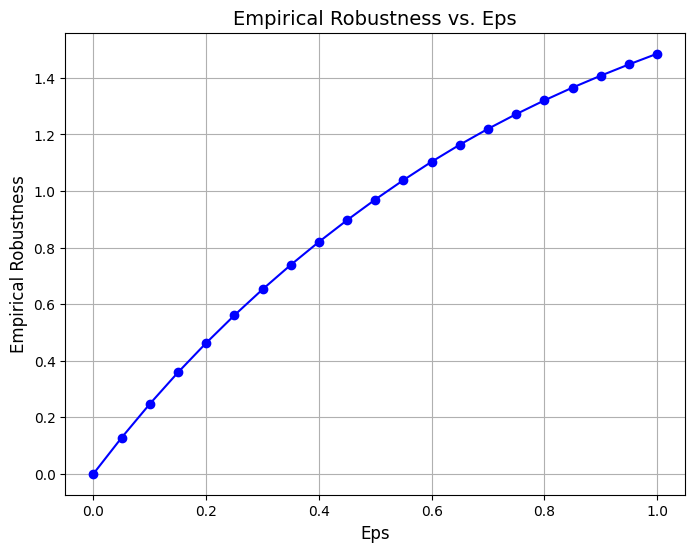

許容範囲内最大（Empirical Robustness:1.0）のepsは 0.50 です


In [21]:
if __name__ == '__main__':
    main()

### #11 License

[required]

In [22]:
## sample ##
ait_owner='AIST'
ait_creation_year='2024'

### #12 Deployment

[uneditable] 

In [23]:
if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
